This is before the end of the trial. Comments from 2008-2021.

In [1]:
import pandas as pd
from textblob import TextBlob

In [7]:
df

,user_name,text,lang,year,month,day,sentiment
0,newestdiscovery,www.newestdiscovery.com update: Amber Heard on...,en,2008,2,13,Positive
1,nick59,Hidden Palms le 14 avril sur NRJ 12: \nTaylor ...,fr,2008,3,25,Negative
2,Kanshin,Amber Heard: \n\t\t\t\t\t\t\t\n\t\t\t\t\t\t最近注...,en,2008,3,7,Neutral
3,krendel,amber heard amber heard - http://tinyurl.com/2...,en,2008,3,15,Neutral
4,toutlebuzz,ToutLeBuzz.com Amber Heard en petite culotte: ...,en,2008,3,26,Neutral
...,...,...,...,...,...,...,...
1669757,Astartiel,how quickly i changed my tune when i realized ...,en,2021,4,7,Positive
1669758,johndomand,@eve_barlow i would like to know who your butl...,en,2021,4,7,Neutral
1669759,twistandshout77,@omgstater @s_sanja_s @eve_barlow “i don’t nee...,en,2021,4,7,Neutral
1669760,milko976,@janespa79755410 @mirrorceleb @ofcom how dare ...,en,2021,4,7,Negative


In [3]:
#remove missing values
df = df.dropna()
df.isnull().sum()

user_name    0
text         0
lang         0
year         0
month        0
day          0
dtype: int64

In [4]:
#change the year, month and day columns to integers
df["year"] = df["year"].astype(int)
df["month"] = df["month"].astype(int)
df["day"] = df["day"].astype(int)

C:\Users\Arya C Prajeesh\AppData\Local\Temp\ipykernel_2784\3475891835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = df["year"].astype(int)
C:\Users\Arya C Prajeesh\AppData\Local\Temp\ipykernel_2784\3475891835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"] = df["month"].astype(int)
C:\Users\Arya C Prajeesh\AppData\Local\Temp\ipykernel_2784\3475891835.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from wordcloud import WordCloud

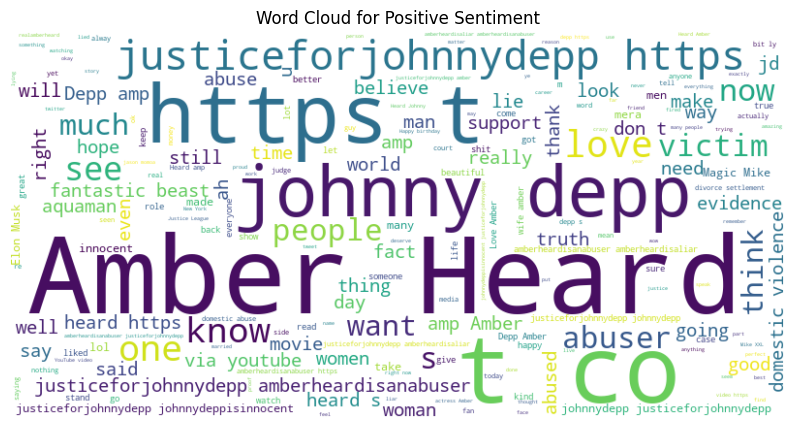

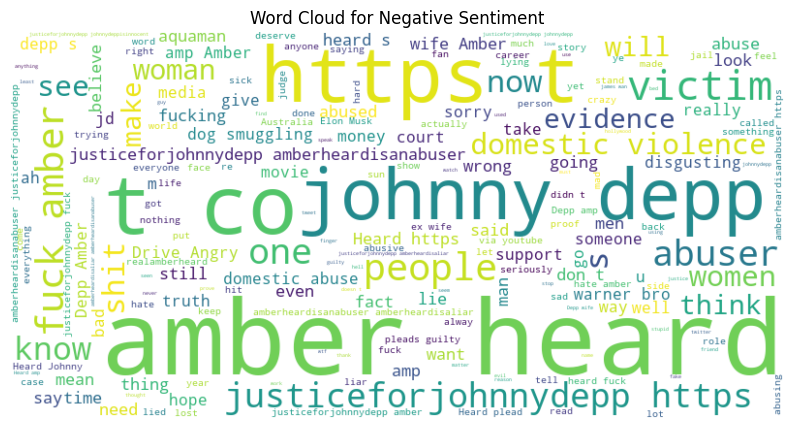

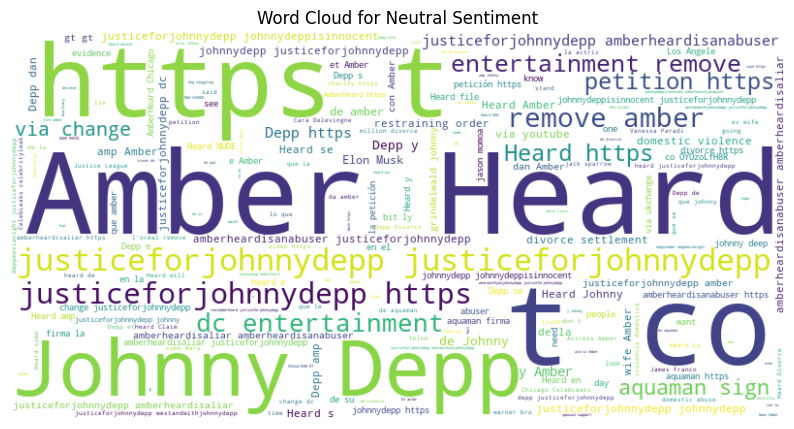

In [12]:
# Generate word clouds for each sentiment category
for sentiment_label in df['sentiment'].unique():
    # Filter tweets by sentiment
    tweets_by_sentiment = df[df['sentiment'] == sentiment_label]['text']
    # Join all tweets into a single string
    text = ' '.join(tweets_by_sentiment)
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    # Plot word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment_label.capitalize()} Sentiment')
    plt.axis('off')
    plt.show()

In [13]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Aggregate sentiment scores by day
sentiment_by_day = df.groupby(df['date'].dt.date)['sentiment'].value_counts().unstack().fillna(0)

C:\Users\Arya C Prajeesh\AppData\Local\Temp\ipykernel_2784\196231236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df[['year', 'month', 'day']])


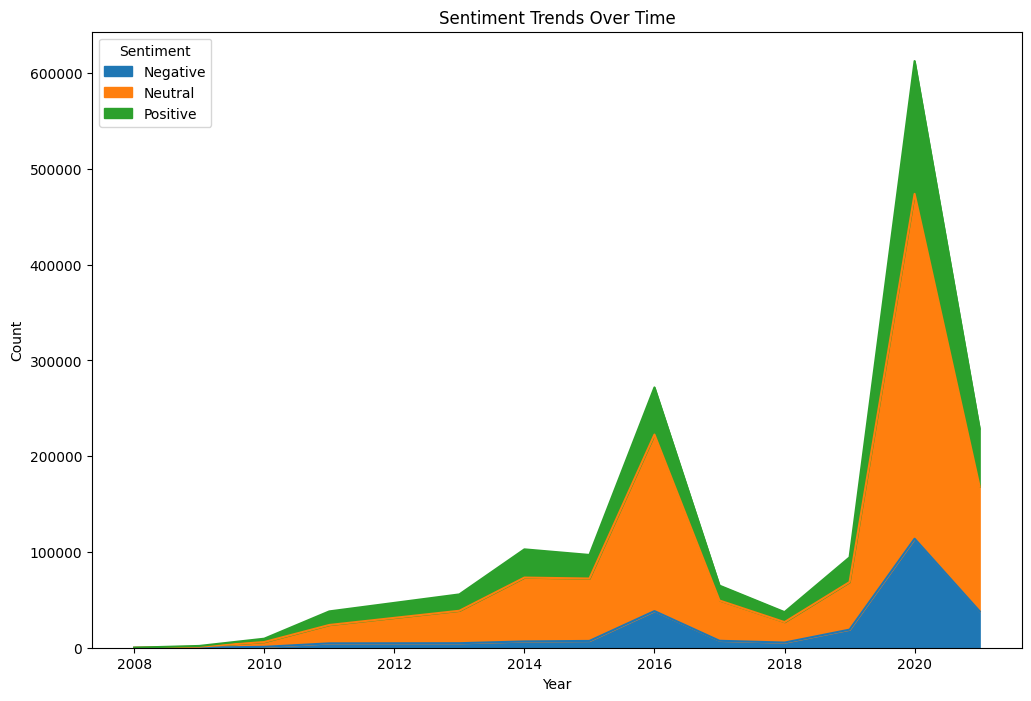

In [14]:
#sentiment trends for each year
sentiment_by_year = df.groupby(df['year'])['sentiment'].value_counts().unstack().fillna(0)

# Plotting sentiment trends over time using an area plot
sentiment_by_year.plot(kind='area', stacked=True, figsize=(12, 8))
plt.title('Sentiment Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

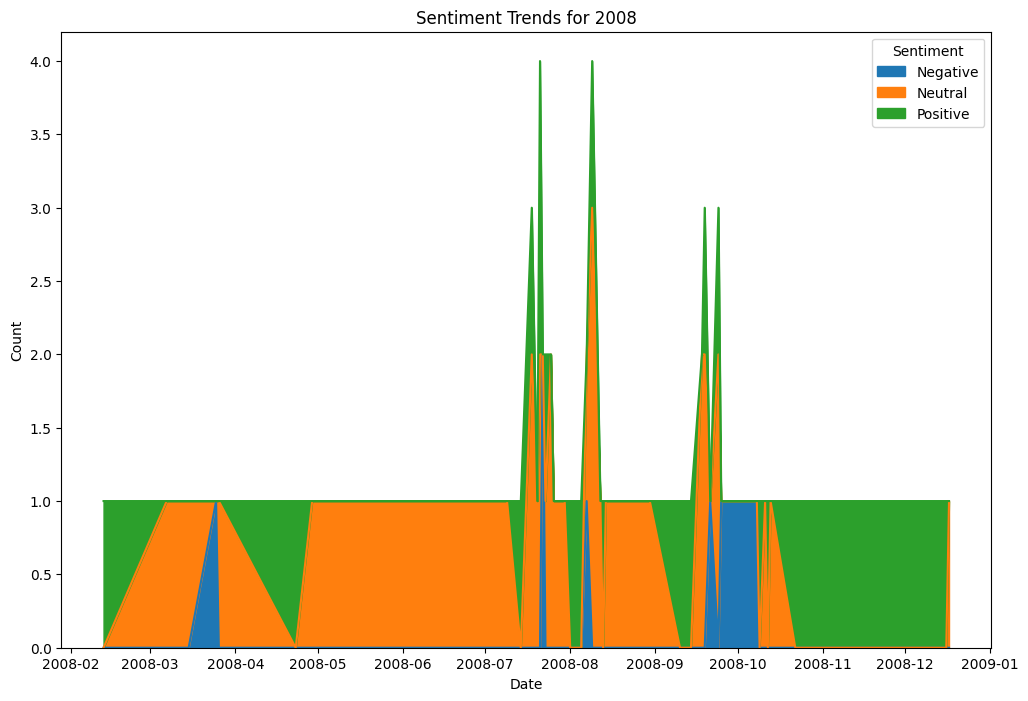

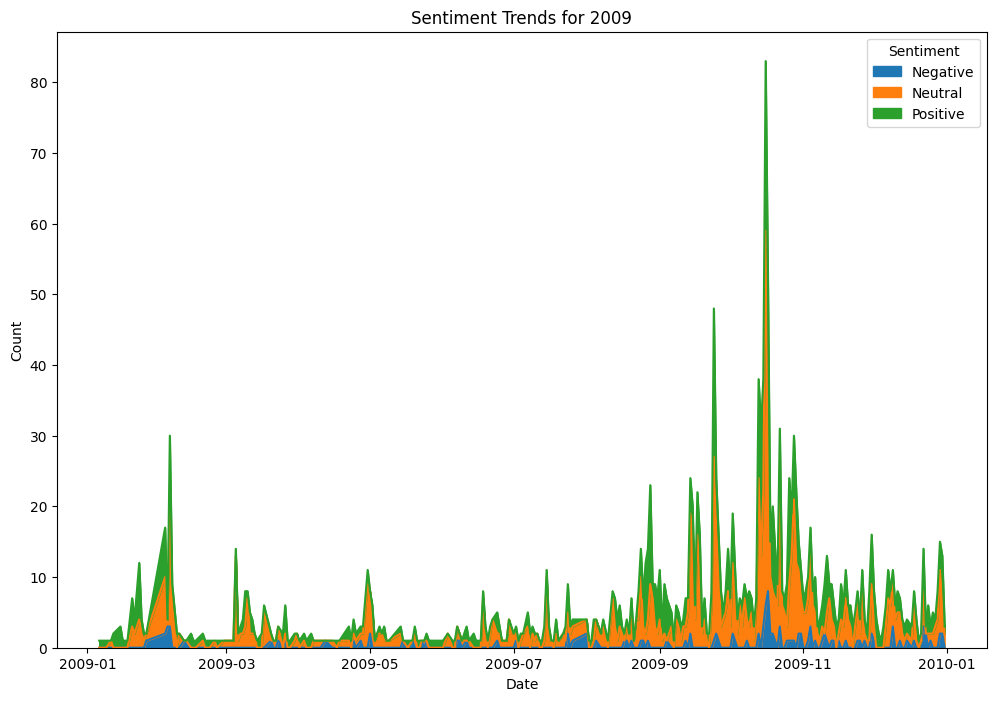

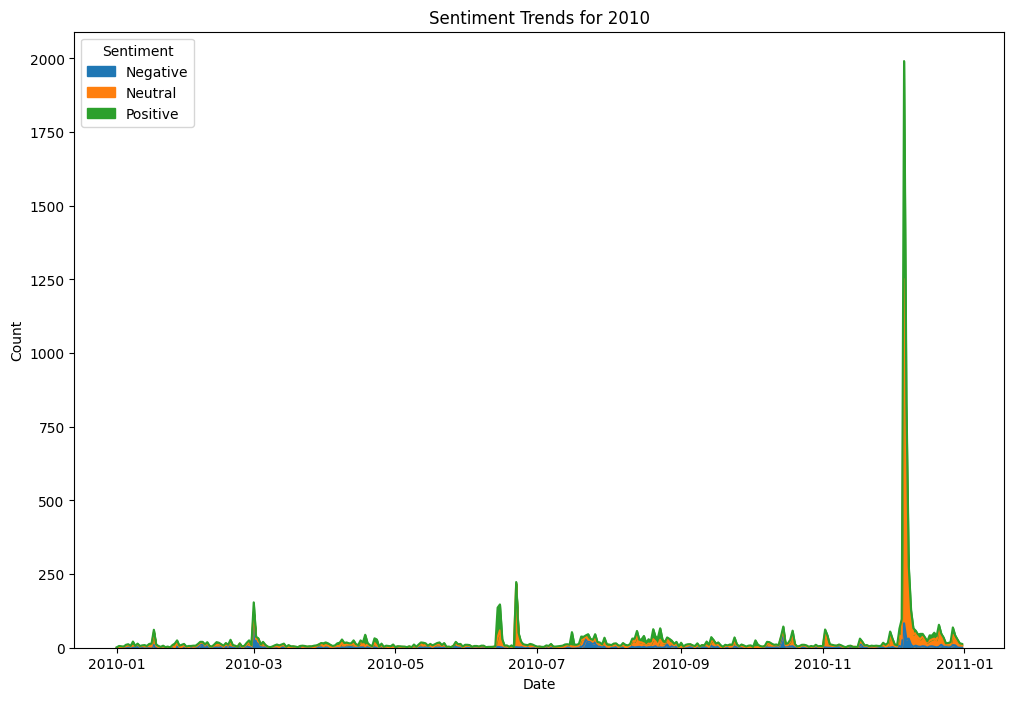

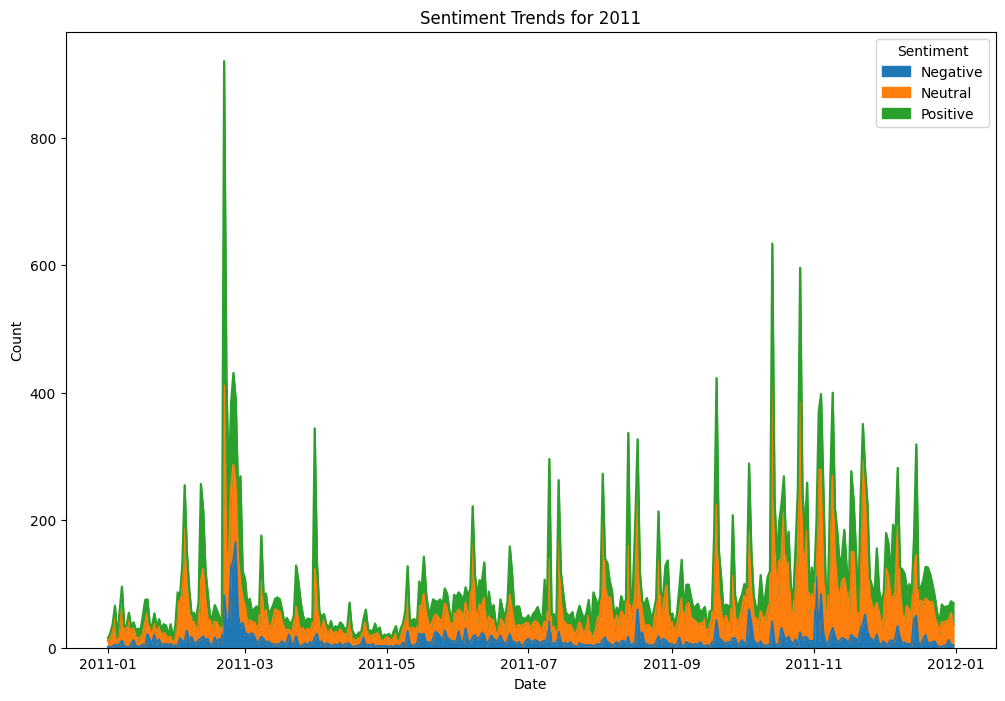

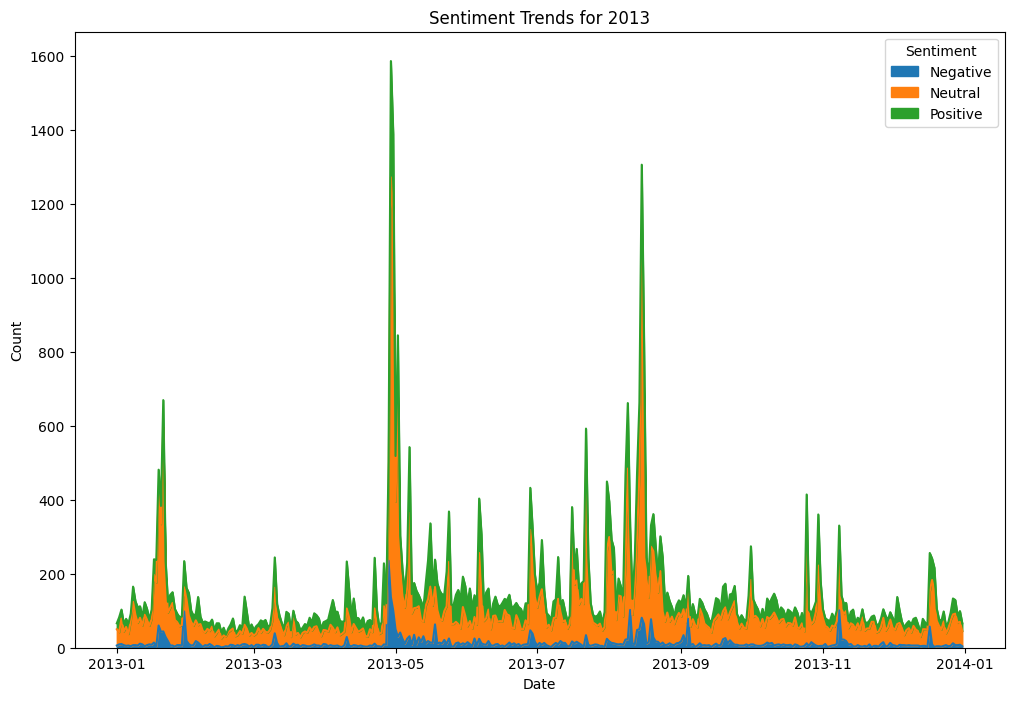

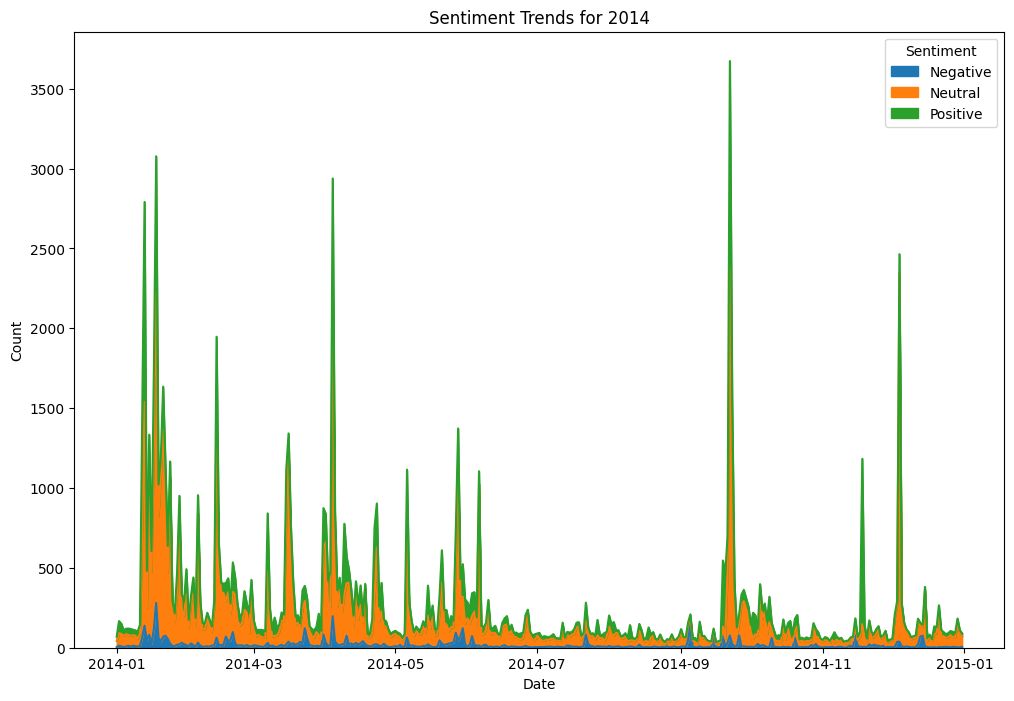

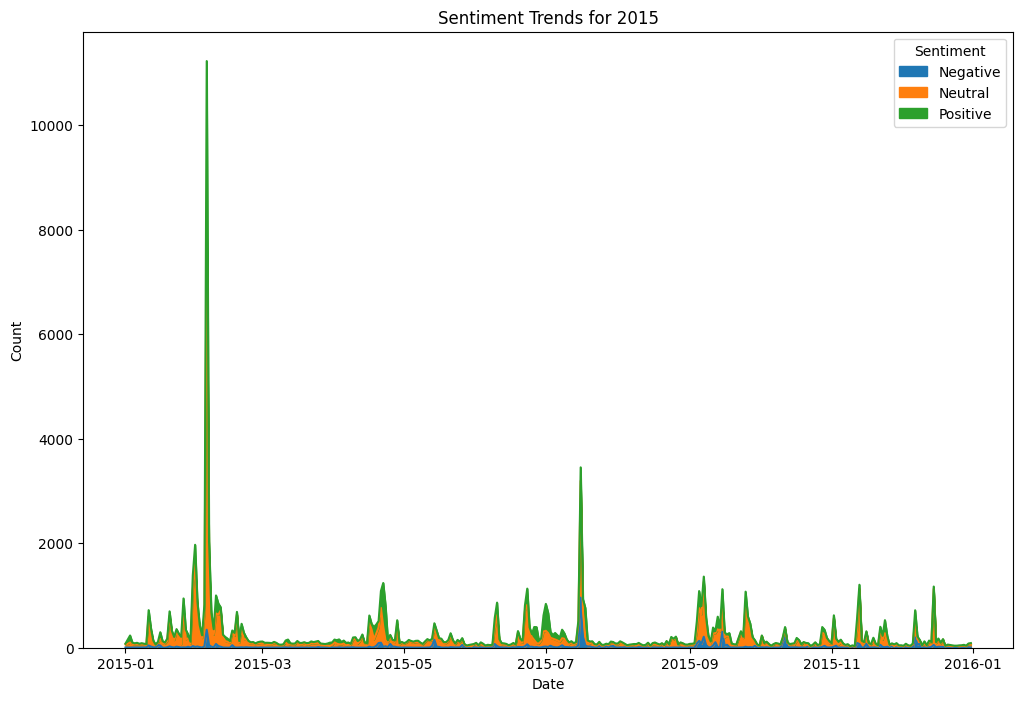

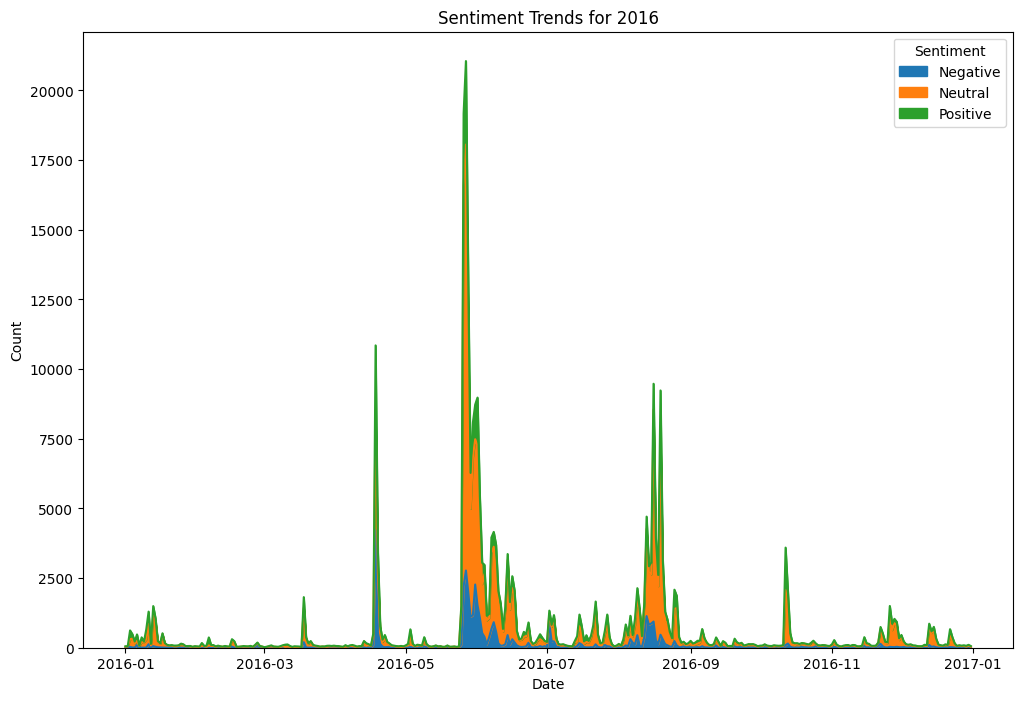

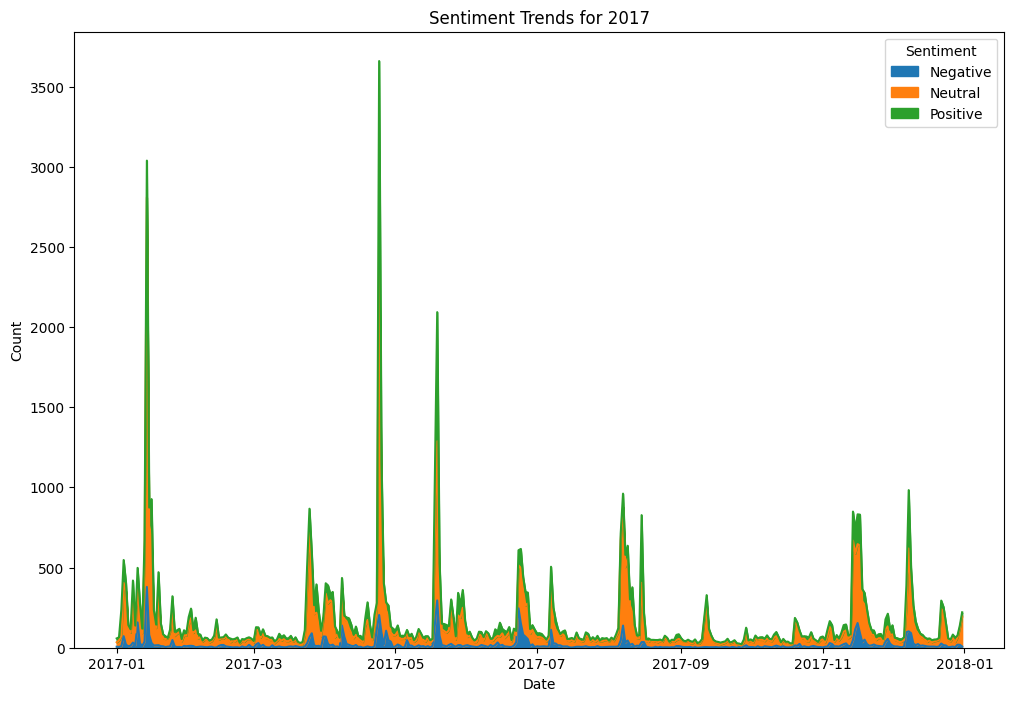

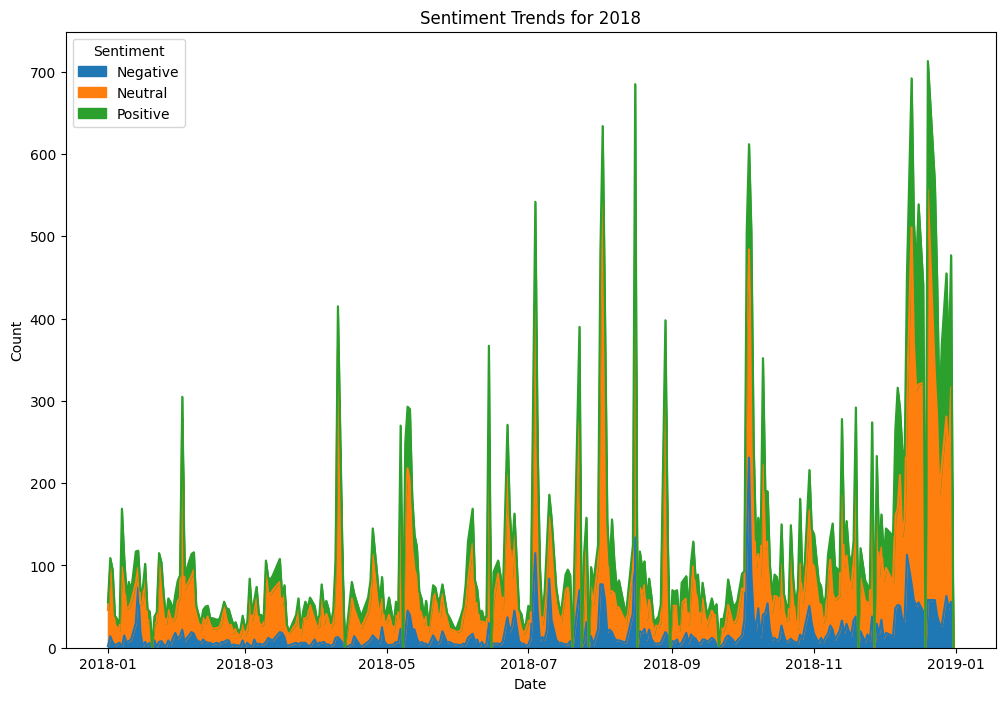

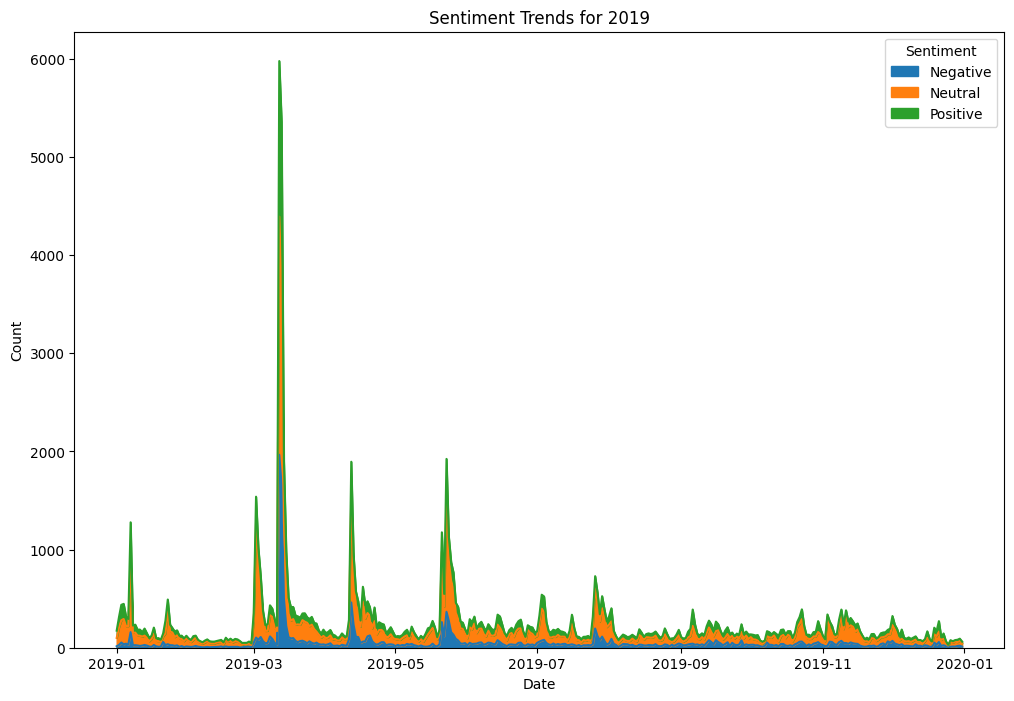

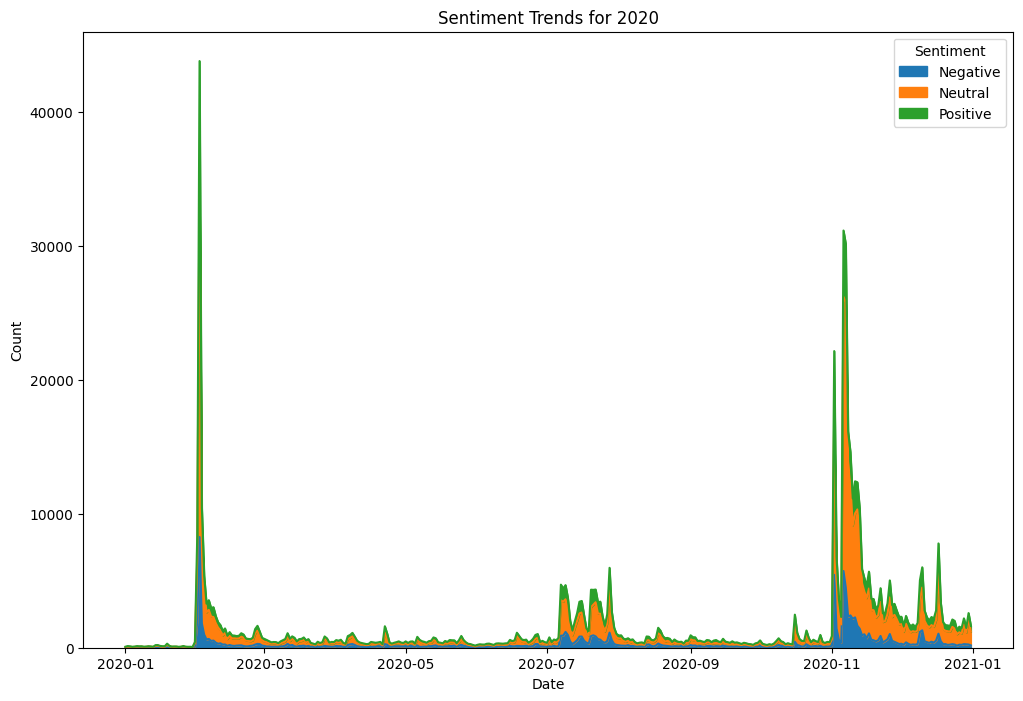

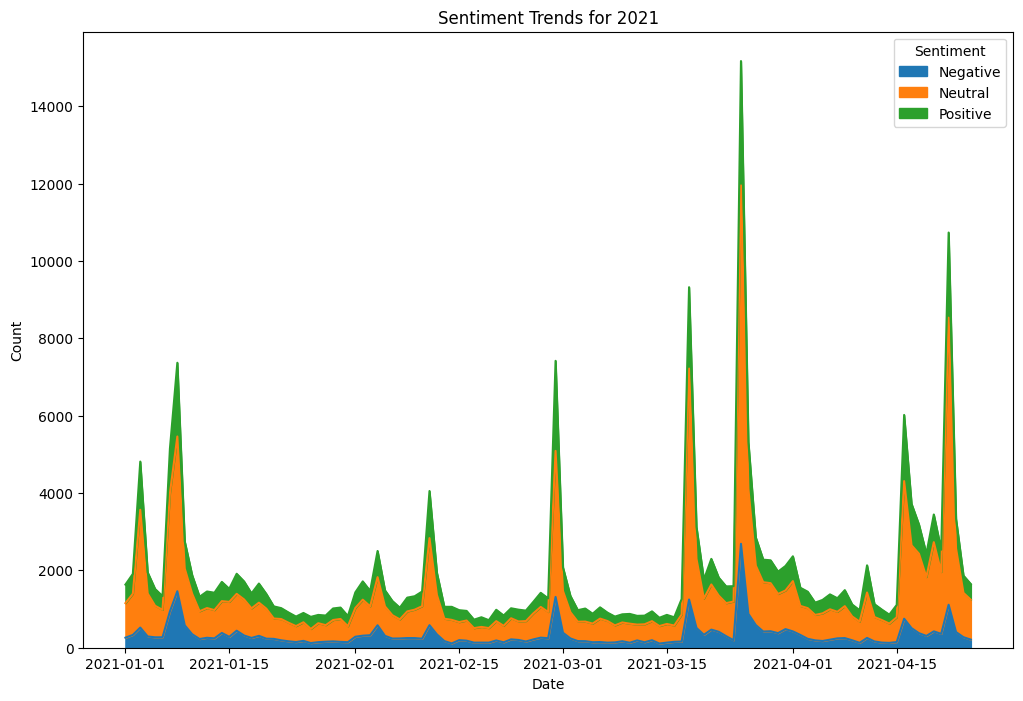

In [15]:
#for each year separately
for year in df['year'].unique():
    sentiment_by_year = df[df['year'] == year].groupby(df['date'].dt.date)['sentiment'].value_counts().unstack().fillna(0)
    sentiment_by_year.plot(kind='area', stacked=True, figsize=(12, 8))
    plt.title(f'Sentiment Trends for {year}')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend(title='Sentiment')
    plt.show()


In [19]:
# Function to perform content analysis
def perform_content_analysis(texts):
    # Calculate the length of each text
    text_lengths = [len(text.split()) for text in texts]
    
    # Calculate the average length of the texts
    avg_length = sum(text_lengths) / len(text_lengths)
    
    # Calculate the total number of words in all texts
    total_words = sum(text_lengths)
    
    # Calculate the vocabulary size (unique words) across all texts
    unique_words = set(" ".join(texts).split())
    vocab_size = len(unique_words)
    
    return avg_length, total_words, vocab_size

texts = df['text']

# Perform content analysis
avg_length, total_words, vocab_size = perform_content_analysis(texts)

# Display the results
print(f"Average text length: {avg_length} words")
print(f"Total number of words: {total_words}")
print(f"Vocabulary size: {vocab_size}")

Average text length: 17.288361370075705 words
Total number of words: 27903640
Vocabulary size: 1857582


In [21]:
subjectivities = []
for tweet in df['text']:
    blob = TextBlob(tweet)
    subjectivity = blob.sentiment.subjectivity
    subjectivities.append(subjectivity)

# Add the subjectivity values to the DataFrame
df['subjectivity'] = subjectivities

# Print the DataFrame with subjectivity values
print(df[['text', 'subjectivity']])

                                                      text  subjectivity
0        www.newestdiscovery.com update: Amber Heard on...      0.429630
1        Hidden Palms le 14 avril sur NRJ 12: \nTaylor ...      0.333333
2        Amber Heard: \n\t\t\t\t\t\t\t\n\t\t\t\t\t\t最近注...      0.000000
3        amber heard amber heard - http://tinyurl.com/2...      0.000000
4        ToutLeBuzz.com Amber Heard en petite culotte: ...      0.000000
...                                                    ...           ...
1669757  how quickly i changed my tune when i realized ...      0.421667
1669758  @eve_barlow i would like to know who your butl...      0.000000
1669759  @omgstater @s_sanja_s @eve_barlow “i don’t nee...      0.000000
1669760  @janespa79755410 @mirrorceleb @ofcom how dare ...      0.688636
1669761                  #scummedia\n#justiceforjohnnydepp      0.000000

[1614013 rows x 2 columns]


C:\Users\Arya C Prajeesh\AppData\Local\Temp\ipykernel_2784\4198911706.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subjectivity'] = subjectivities


C:\Users\Arya C Prajeesh\AppData\Local\Temp\ipykernel_2784\1443249024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))


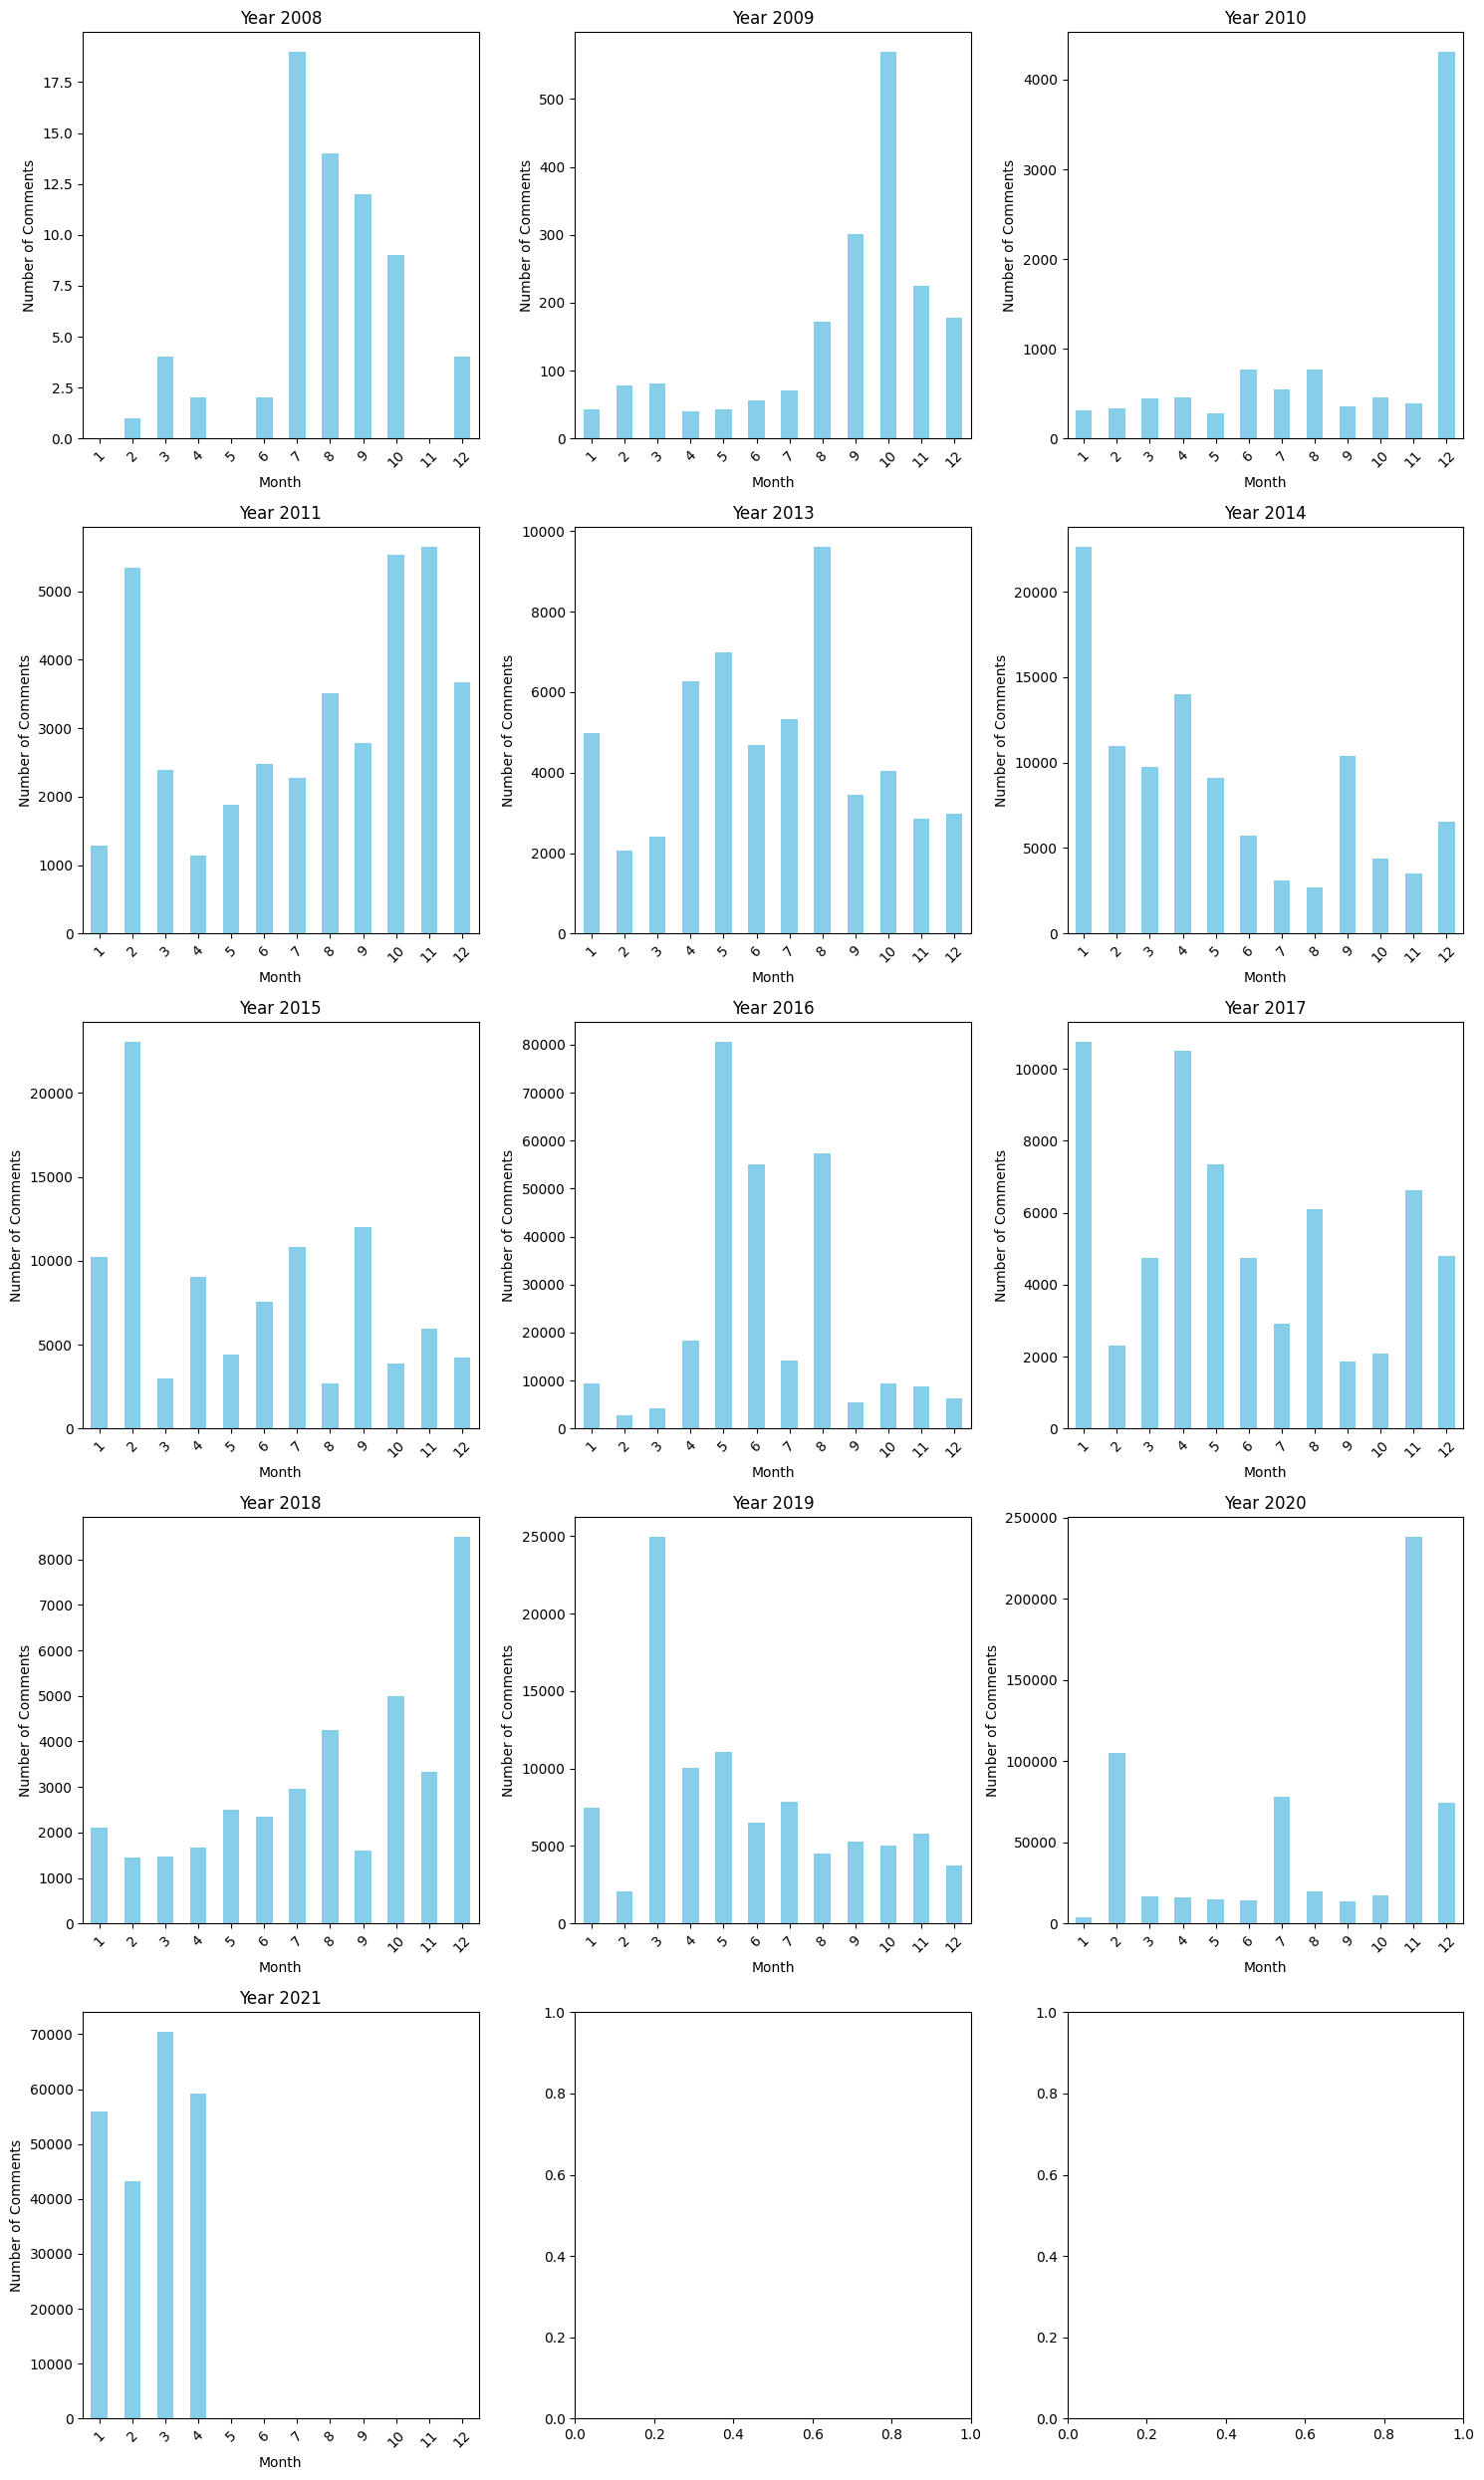

In [23]:
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# Group by year and month, and count the number of comments
comments_per_month = df.groupby([df['date'].dt.year, df['date'].dt.month]).size().unstack(fill_value=0)

# Get the unique years in the dataset
unique_years = df['date'].dt.year.unique()

# Plotting subplots for each year
num_years = len(unique_years)
num_cols = 3  # Number of columns for subplots
num_rows = (num_years - 1) // num_cols + 1  # Number of rows for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, year in enumerate(unique_years):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    
    # Plotting
    comments_per_month.loc[year].plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Year {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Comments')
    ax.set_xticklabels(comments_per_month.columns, rotation=45)
    ax.legend().remove()

# Adjust layout
plt.tight_layout()
plt.show()

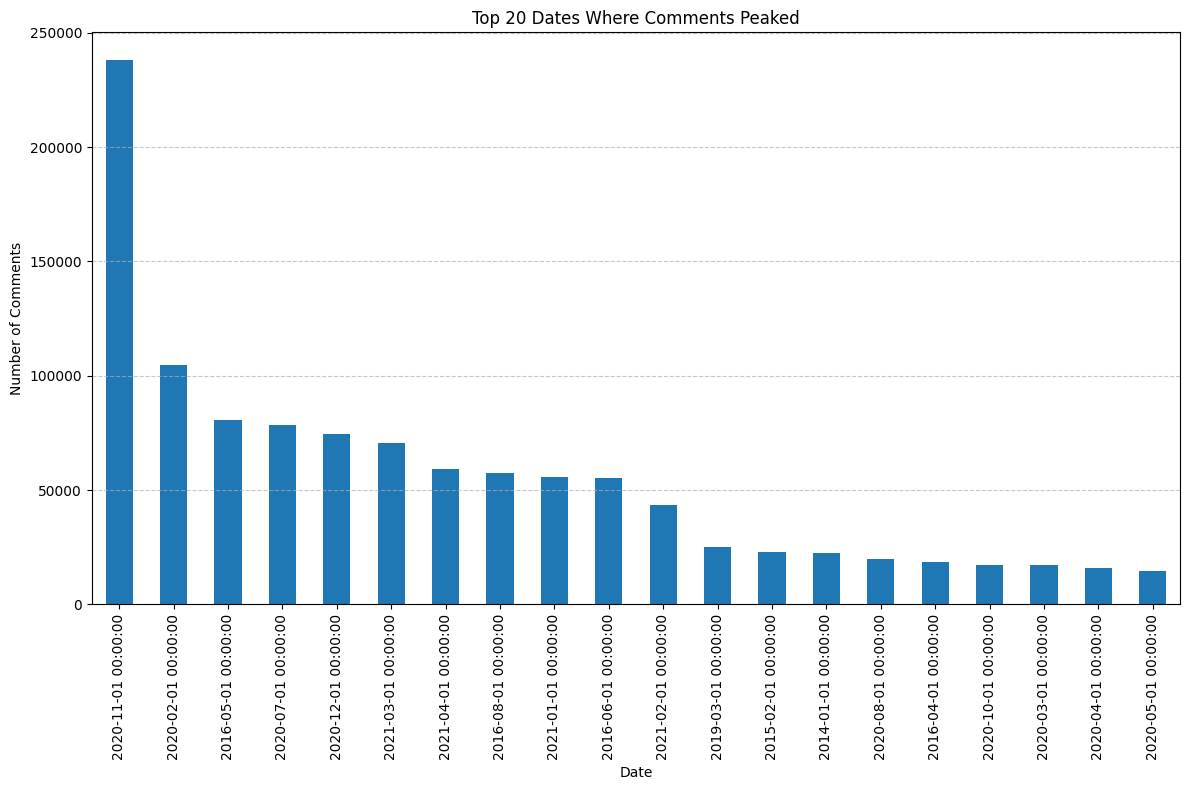

In [25]:
# Group by date and count the number of comments for each date
comments_per_date = df.groupby('date').size()

# Sort the dates based on the total number of comments
top_dates = comments_per_date.sort_values(ascending=False).head(20)

# Plotting
plt.figure(figsize=(12, 8))
top_dates.plot(kind='bar')
plt.title('Top 20 Dates Where Comments Peaked')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

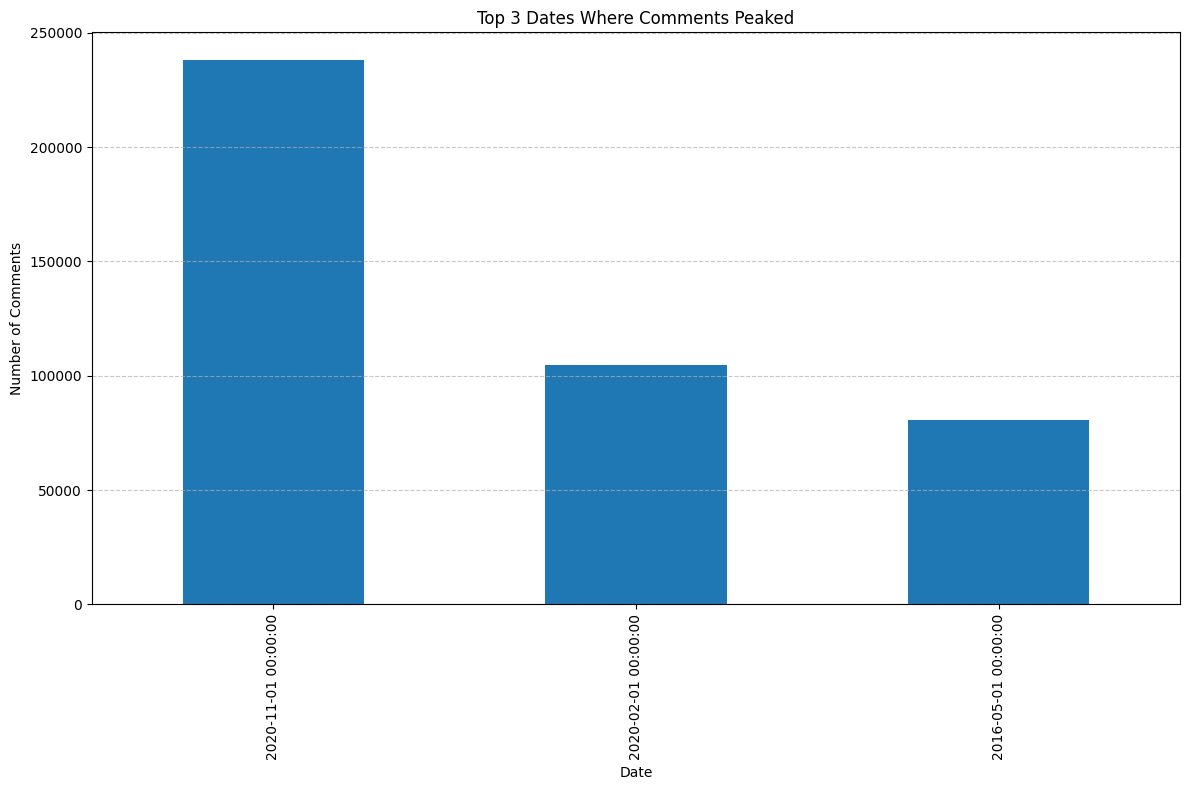

In [27]:
comments_per_date = df.groupby('date').size()

# Sort the dates based on the total number of comments
top_dates = comments_per_date.sort_values(ascending=False).head(3)

# Plotting
plt.figure(figsize=(12, 8))
top_dates.plot(kind='bar')
plt.title('Top 3 Dates Where Comments Peaked')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

On 1st November the first trial result came out where it was revealed that Depp absued his ex wife giving him the label "Wife Beater."

In May 2016 Amber Heard claimed that Depp abused her physically which he denied, resulting in her acquiring a restraning order

C:\Users\Arya C Prajeesh\AppData\Local\Temp\ipykernel_2784\3610583722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_comments['date'] = pd.to_datetime(negative_comments[['year', 'month', 'day']])


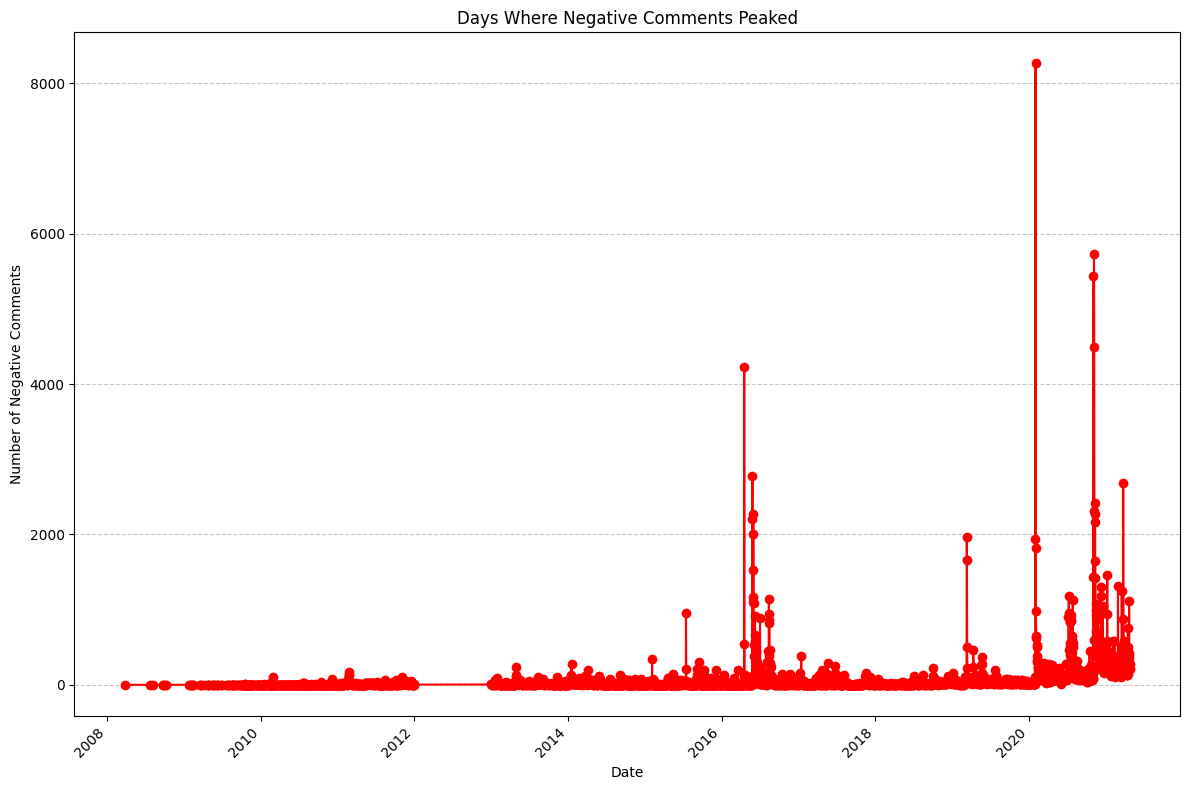

In [30]:
negative_comments = df[df['sentiment'] == 'Negative']

# Convert 'year', 'month', and 'day' columns to datetime format
negative_comments['date'] = pd.to_datetime(negative_comments[['year', 'month', 'day']])

# Group by date and count the number of negative comments for each date
negative_comments_per_date = negative_comments.groupby('date').size()

# Plotting
plt.figure(figsize=(12, 8))
negative_comments_per_date.plot(kind='line', marker='o', color='red')
plt.title('Days Where Negative Comments Peaked')
plt.xlabel('Date')
plt.ylabel('Number of Negative Comments')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Arya C Prajeesh\AppData\Local\Temp\ipykernel_2784\96132540.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_comments['date'] = pd.to_datetime(positive_comments[['year', 'month', 'day']])


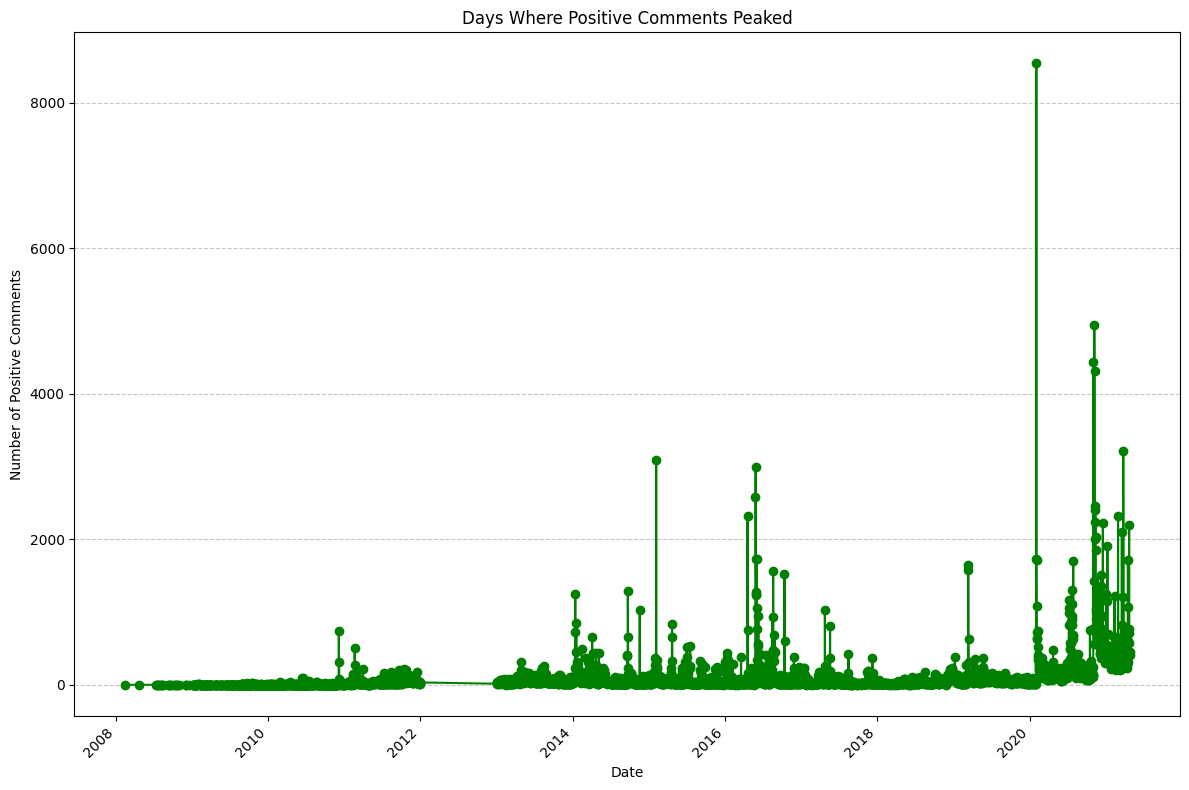

In [35]:
positive_comments = df[df['sentiment'] == 'Positive']

# Convert 'year', 'month', and 'day' columns to datetime format
positive_comments['date'] = pd.to_datetime(positive_comments[['year', 'month', 'day']])

# Group by date and count the number of negative comments for each date
positive_comments_per_date = positive_comments.groupby('date').size()

# Plotting
plt.figure(figsize=(12, 8))
positive_comments_per_date.plot(kind='line', marker='o', color='green')
plt.title('Days Where Positive Comments Peaked')
plt.xlabel('Date')
plt.ylabel('Number of Positive Comments')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

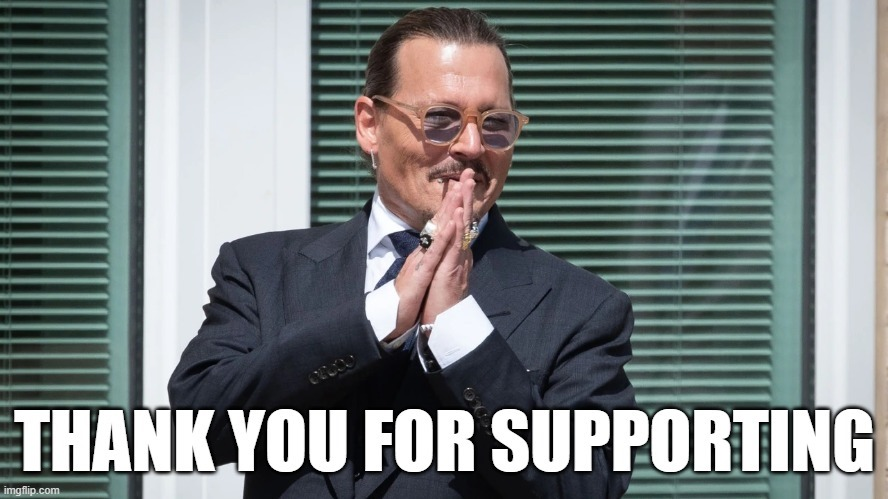